#### Week 2 Assignment 
##### Michael Perrine
##### DSC 550
##### Professor Werner

<h3 align="center"><center>Pixar Movie Analysis</h3>>


The purpose of this analysis is to determine which Pixar movies earned the most revenue. In addition I want to learn how cost equates to revenue. I will construct some graphs to begin my analysis.To begin the analysis I will import the data from Kaggle. I will import some libraries to conduct my exploratory analysis.

In [2]:
# This code imports the libraries needed for analysis
import pandas as pd   
import matplotlib.pyplot as plt
import matplotlib.dates as dates  
from datetime import datetime
import numpy as np
import warnings
import seaborn as sns

In [3]:
# This code reads in the dataset
pixar = pd.read_csv(r"C:\Users\mchlp\OneDrive\Documents\Data Mining\pixar_films new.csv")

In [4]:
# This code displays the first 10 rows
pixar.head(10)

,ID,film,film_rating,cinema_score,release_date,run_time,budget,box_office_us_canada,box_office_other,box_office_worldwide,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,imdb_score,imdb_counts
0,1,Toy Story,G,A,11/22/1995,81,30000000,223225679,171210907,394436586,100,96,95,26,8.3,1089101
1,2,A Bug's Life,G,A,11/25/1998,95,120000000,162798565,200460294,363258859,92,91,78,23,7.2,319596
2,3,Toy Story 2,G,A+,11/24/1999,92,90000000,245852179,265506097,511358276,100,172,88,34,7.9,630573
3,4,"Monsters, Inc.",G,A+,11/2/2001,92,115000000,255873250,272900000,528773250,96,199,79,35,8.1,1000657
4,5,Finding Nemo,G,A+,5/30/2003,100,94000000,339714978,531300000,871014978,99,270,90,38,8.2,1132877
5,6,The Incredibles,PG,A+,11/5/2004,115,92000000,261441092,370001000,631442092,97,250,90,41,8.0,828986
6,7,Cars,G,A,6/9/2006,116,120000000,244082982,217900167,461983149,75,204,73,39,7.2,484034
7,8,Ratatouille,G,A,6/29/2007,111,150000000,206445654,417280431,623726085,96,253,96,37,8.1,851229
8,9,WALL-E,G,A,6/27/2008,98,180000000,223808164,297503696,521311860,95,261,95,39,8.4,1226415
9,10,Up,PG,A+,5/29/2009,96,175000000,293004164,442094918,735099082,98,297,88,37,8.3,1151249


In [5]:
# This code shows the number of rows and columns
pixar.shape

(28, 16)

In [6]:
warnings.filterwarnings("ignore")

The first graph that I will look at is a time line of the Pixar movies. I want to get a grasp of the full body of work. The time line will allow me to get a better understanding of Pixar. 

In order to construct the time line I want to create a second data frame that consists of just the movies and the dates. This will allow me to focus on these two data points. In addition I want to add another column labeled level. The level column will give me the ability to space out the movies for better readability. 

In [7]:
# This code creates the data frame pixar_movies and take the movies and release date of the movies. In addition a new column was added to hold the level variable.
pixar_movies=pixar[['film', 'release_date']]
pixar_movies['release_date'] = pd.to_datetime(pixar_movies['release_date'])
pixar_movies['level']= [np.random.randint(-6, -2) if (i%2) == 0 else np.random.randint(2,6) for i in range(len(pixar_movies))]



In [8]:
# This code displays the top and bottom 5 lines of the dataset
print(pixar_movies.head(5))
print(pixar_movies.tail(5))

             film release_date  level
0       Toy Story   1995-11-22     -4
1    A Bug's Life   1998-11-25      3
2     Toy Story 2   1999-11-24     -3
3  Monsters, Inc.   2001-11-02      5
4    Finding Nemo   2003-05-30     -3
            film release_date  level
23          Luca   2021-06-18      4
24   Turning Red   2022-03-11     -3
25     Lightyear   2022-06-17      2
26     Elemental   2023-06-16     -3
27  Inside Out 2   2024-06-14      5


Now that we have created the new data set we can begin creating the timeline. 

Text(0.5, 0, 'Date')

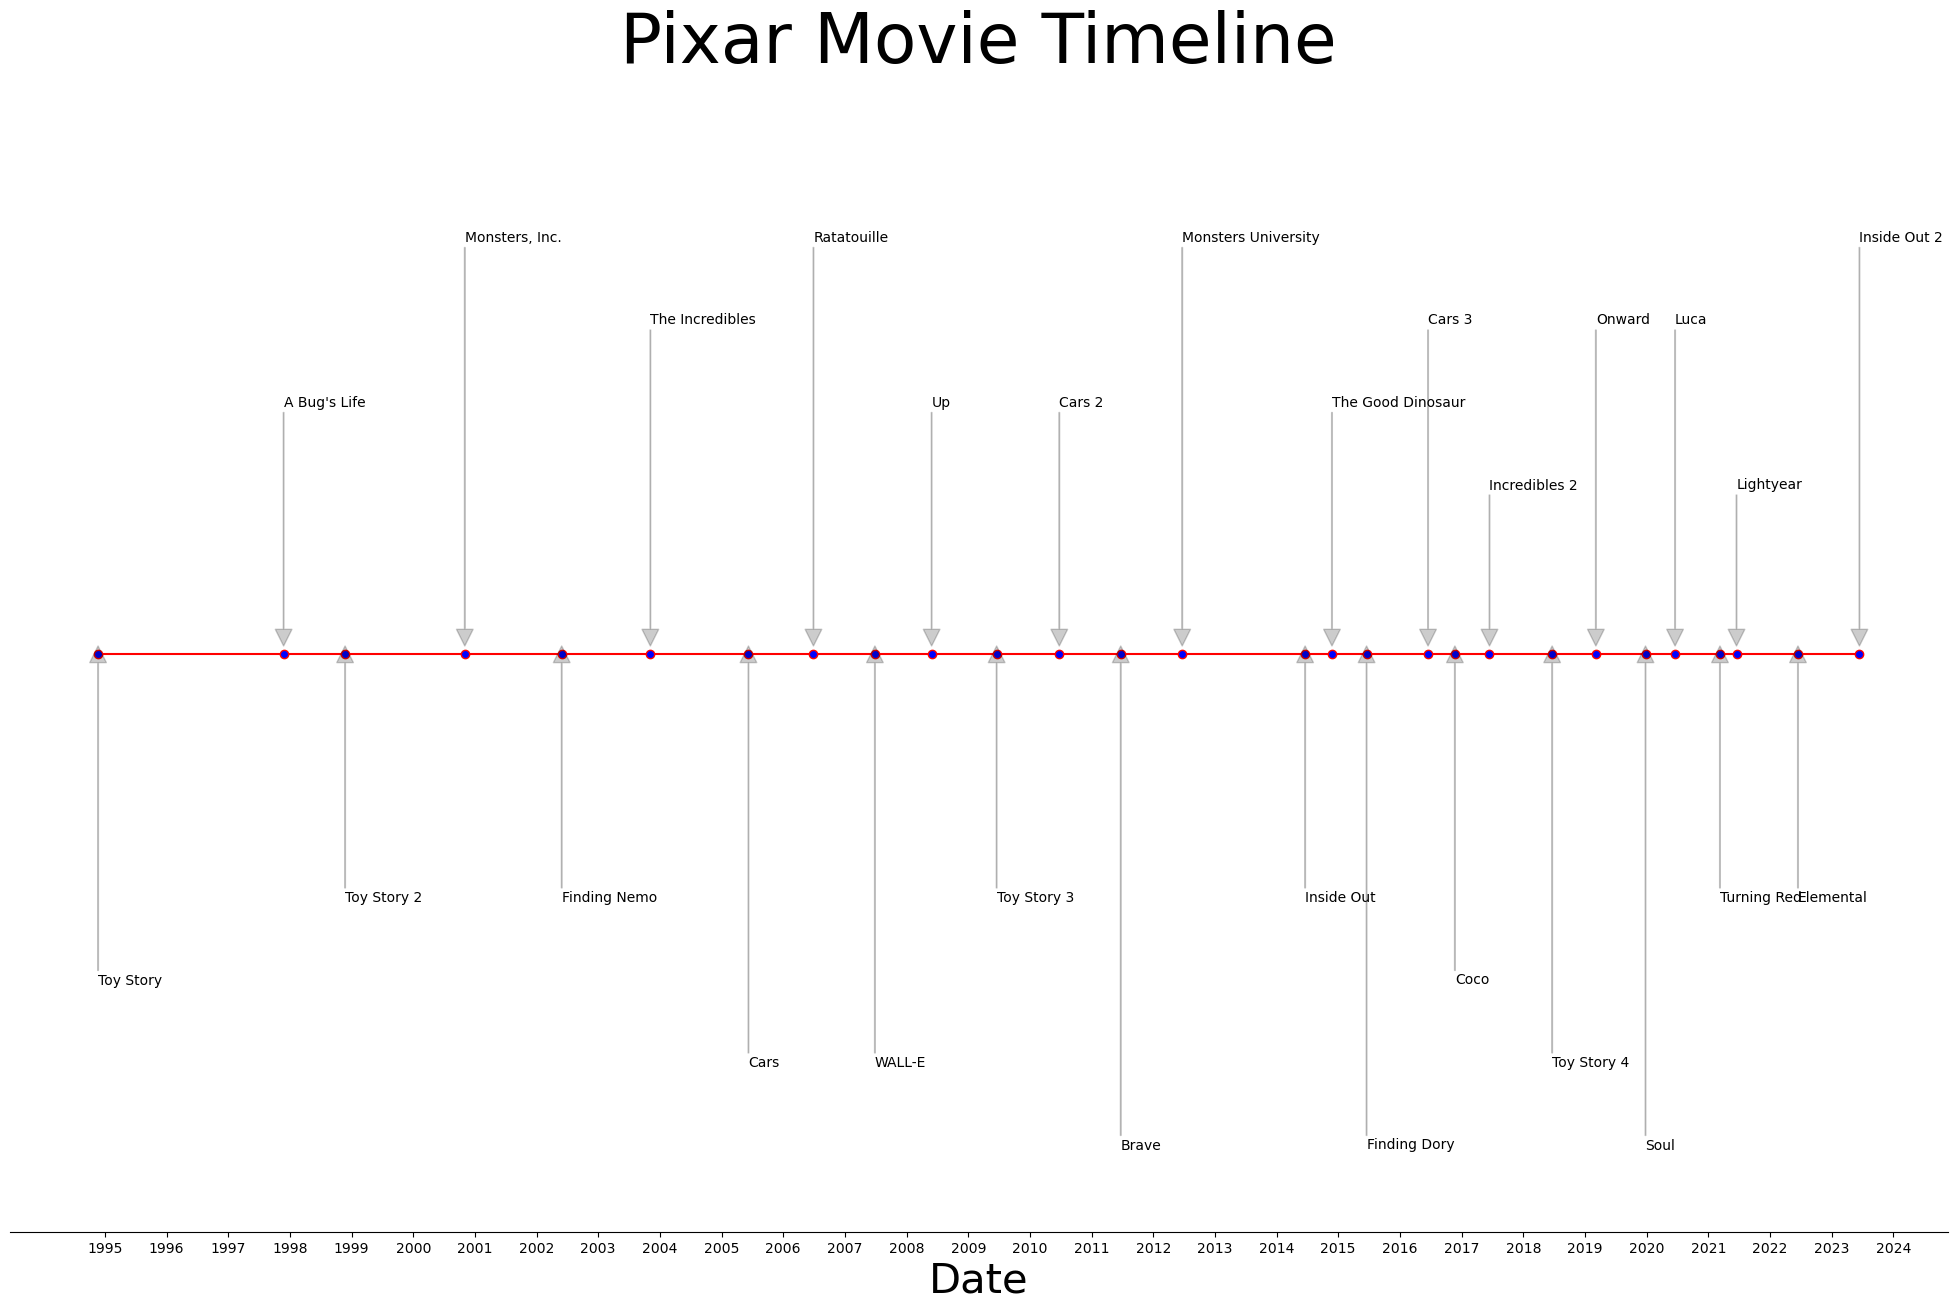

In [9]:

# The following set of code creates the time line

# This line creates the figure for the timeline
fig, ax = plt.subplots(figsize=(25,15))

# This set of code creates the horizontal line for the timeline
ax.plot(pixar_movies.release_date, [0,]* len(pixar_movies), "-o", color="red", markerfacecolor="blue");

# This set of code creates the date range for the timeline
ax.set_xticks(pd.date_range("1995-11-01", "2025-01-01", freq="ys"), range(1995,2025));

ax.set_ylim(-7,7);

# This set of code adds the movies to the time line. In addition the code adds the vertical lines to connect the movies to the dates
for idx in range(len(pixar_movies)):
    film, release_date, level= pixar_movies["film"][idx],pixar_movies["release_date"][idx],pixar_movies["level"][idx]
    ax.annotate(film, xy=(release_date, 0.1), xytext=(release_date, level), 
                arrowprops=dict(color="black", width=0.5, alpha=0.2));

# The final block of code removes the splines and axis. In addition the code creates the title and and label for the date.
ax.spines[["left", "top", "right"]].set_visible(False);
ax.yaxis.set_visible(False);
ax.set_title("Pixar Movie Timeline", size=50)
ax.set_xlabel("Date", size= 30)



Next I want to see the global box office revenues for Pixar films. To do this I will construct a histogram. This histogram will give me a snapshot of the revenues for Pixar movies. Based on the histogram I see the movies are right skewed with an outlier. I also noticed that the largest number of movies (7) earned $500,000,000.00 

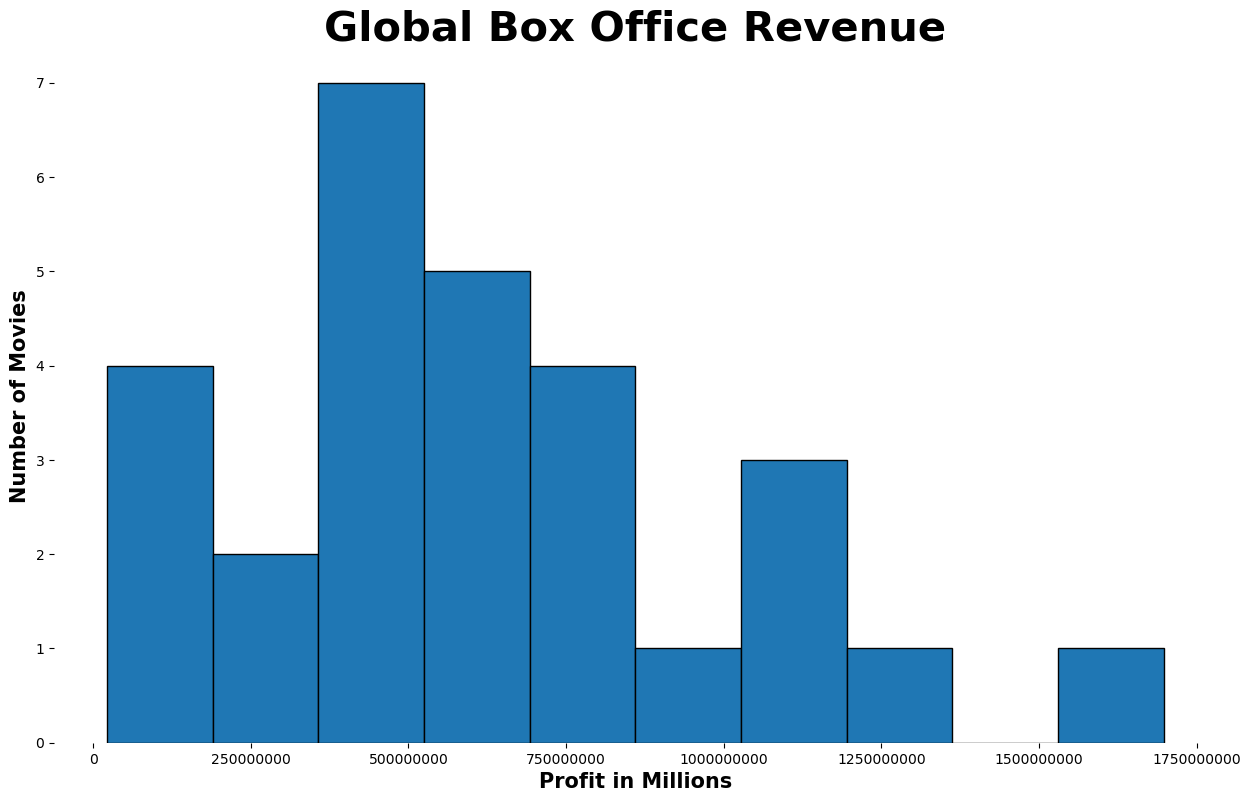

In [10]:

fig, ax = plt.subplots(figsize=(15,9))
plt.title("Global Box Office Revenue", fontsize=30, weight="bold")
plt.xlabel("Profit in Millions", fontsize= 15, weight="bold")
plt.ylabel("Number of Movies", fontsize= 15, weight= "bold")
sns.despine(left= True, top= True, bottom= True)
plt.hist(pixar['box_office_worldwide'], bins=10, edgecolor= "black")
plt.ticklabel_format(style="plain")


plt.show()


After viewing the histogram I want to see the relationship between the budgets of the pixar movies and the global revenue generated. The scatter plot is a great way to uncover relationships in the data. I expected that the more money spent in the budget will translate in more dollars at the box office. In reality we see a mixed bag so to speak. I did notice that the movie that made the most money also was in the category with high budgets. However I also see lower earning movies spent a lot of money in the budget. This leads me to believe that another factor is involved in the box office returns for the movies.

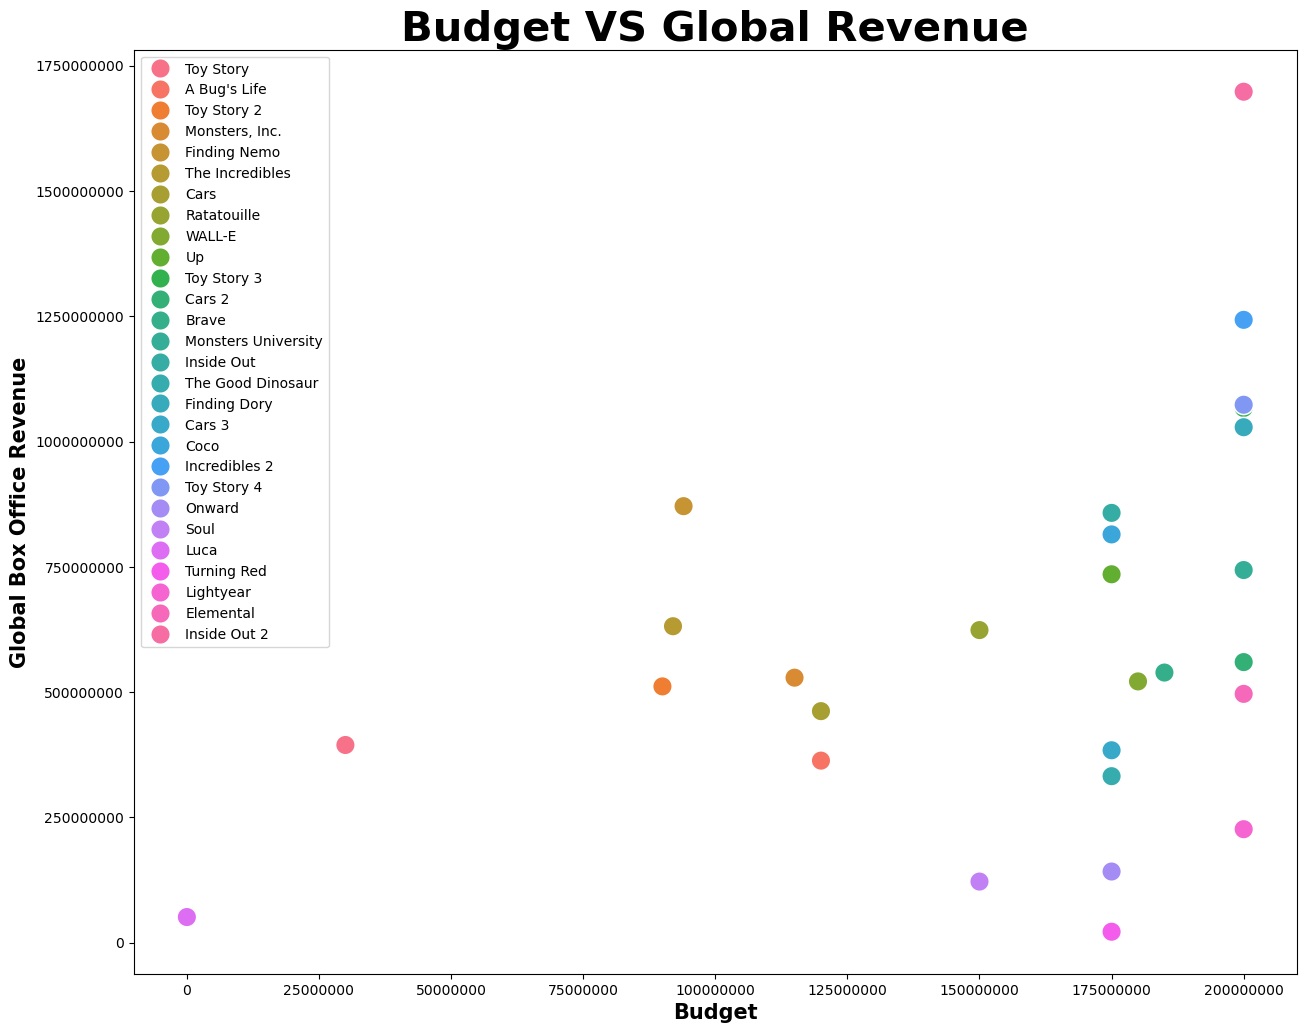

In [56]:
fig, ax = plt.subplots(figsize=(15,12))
sns.scatterplot(x=pixar['budget'], y=pixar['box_office_worldwide'], hue=pixar['film'], s=200)
plt.legend(loc="upper left")
plt.ticklabel_format(style="plain") 
plt.title("Budget VS Global Revenue", fontsize=30, weight="bold")
plt.xlabel("Budget", fontsize=15, weight="bold")
plt.ylabel("Global Box Office Revenue", fontsize=15, weight="bold")
plt.show()

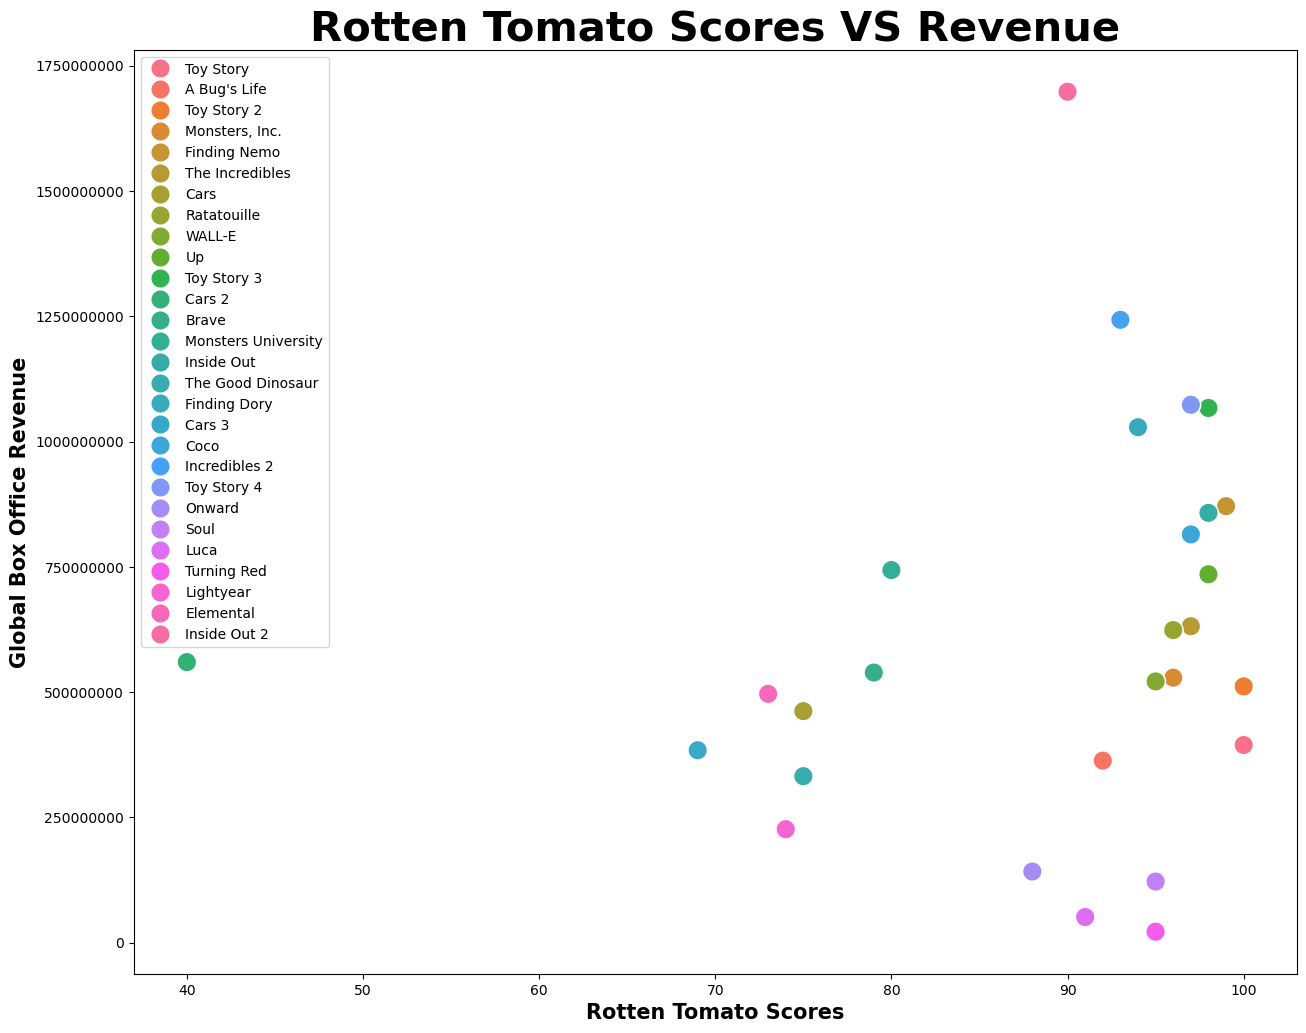

In [58]:
fig, ax = plt.subplots(figsize=(15,12))
sns.scatterplot(x=pixar['rotten_tomatoes_score'], y=pixar['box_office_worldwide'], hue=pixar['film'], s=200)
plt.legend(loc="upper left")
plt.ticklabel_format(style="plain") 
plt.title("Rotten Tomato Scores VS Revenue", fontsize=30, weight="bold")
plt.xlabel("Rotten Tomato Scores", fontsize=15, weight="bold")
plt.ylabel("Global Box Office Revenue", fontsize=15, weight="bold")
plt.show()